## Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# Questions:#
1. What is the target customer if a new product is introduced
2. What is the type of promotion needed for the target customer if new product is introduced
3. What is the target market product if a new customer is introduced.
4. What is the type of promotion is needed for that product to that new customer

# Attributes

### People
1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's
household
8. Teenhome: Number of teenagers in customer's household
9. Dt_Customer: Date of customer's enrollment with the company
10. Recency: Number of days since customer's last purchase
10.Complain: 1 if customer complained in the last 2 years, 0 otherwise

### Products

1. MntWines: Amount spent on wine in last 2 years
2. MntFruits: Amount spent on fruits in last 2 years
3. MntMeatProducts: Amount spent on meat in last 2 years
4. MntFishProducts: Amount spent on fish in last 2 years
5. MntSweetProducts: Amount spent on sweets in last 2 years
6. MntGoldProds: Amount spent on gold in last 2 years

### Promotion
1. NumDealsPurchases: Number of purchases made with a discount
2. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
3. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
4. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
5. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
6. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
7. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place
1. NumWebPurchases: Number of purchases made through the company’s web site
2. NumCatalogPurchases: Number of purchases made using a catalogue
3. NumStorePurchases: Number of purchases made directly in stores
4. NumWebVisitsMonth: Number of visits to company’s web site in the last month

### Import libraries needed for the project

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

### Import the data

In [ ]:
Data=pd.read_csv("/content/marketing_campaign.csv",delimiter="\t")

## Clean the data

In [ ]:
Data.dtypes
Data["Dt_Customer"]=pd.to_datetime(Data["Dt_Customer"])
Data["Dt_Customer"].head()

0   2012-04-09
1   2014-08-03
2   2013-08-21
3   2014-10-02
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [ ]:
max(list(Data.isnull().sum()))

24

In [ ]:
Data=Data.dropna()
Data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
Data["Year_Birth"]=2021-Data["Year_Birth"]
Data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,64,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,67,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,56,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,37,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,40,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


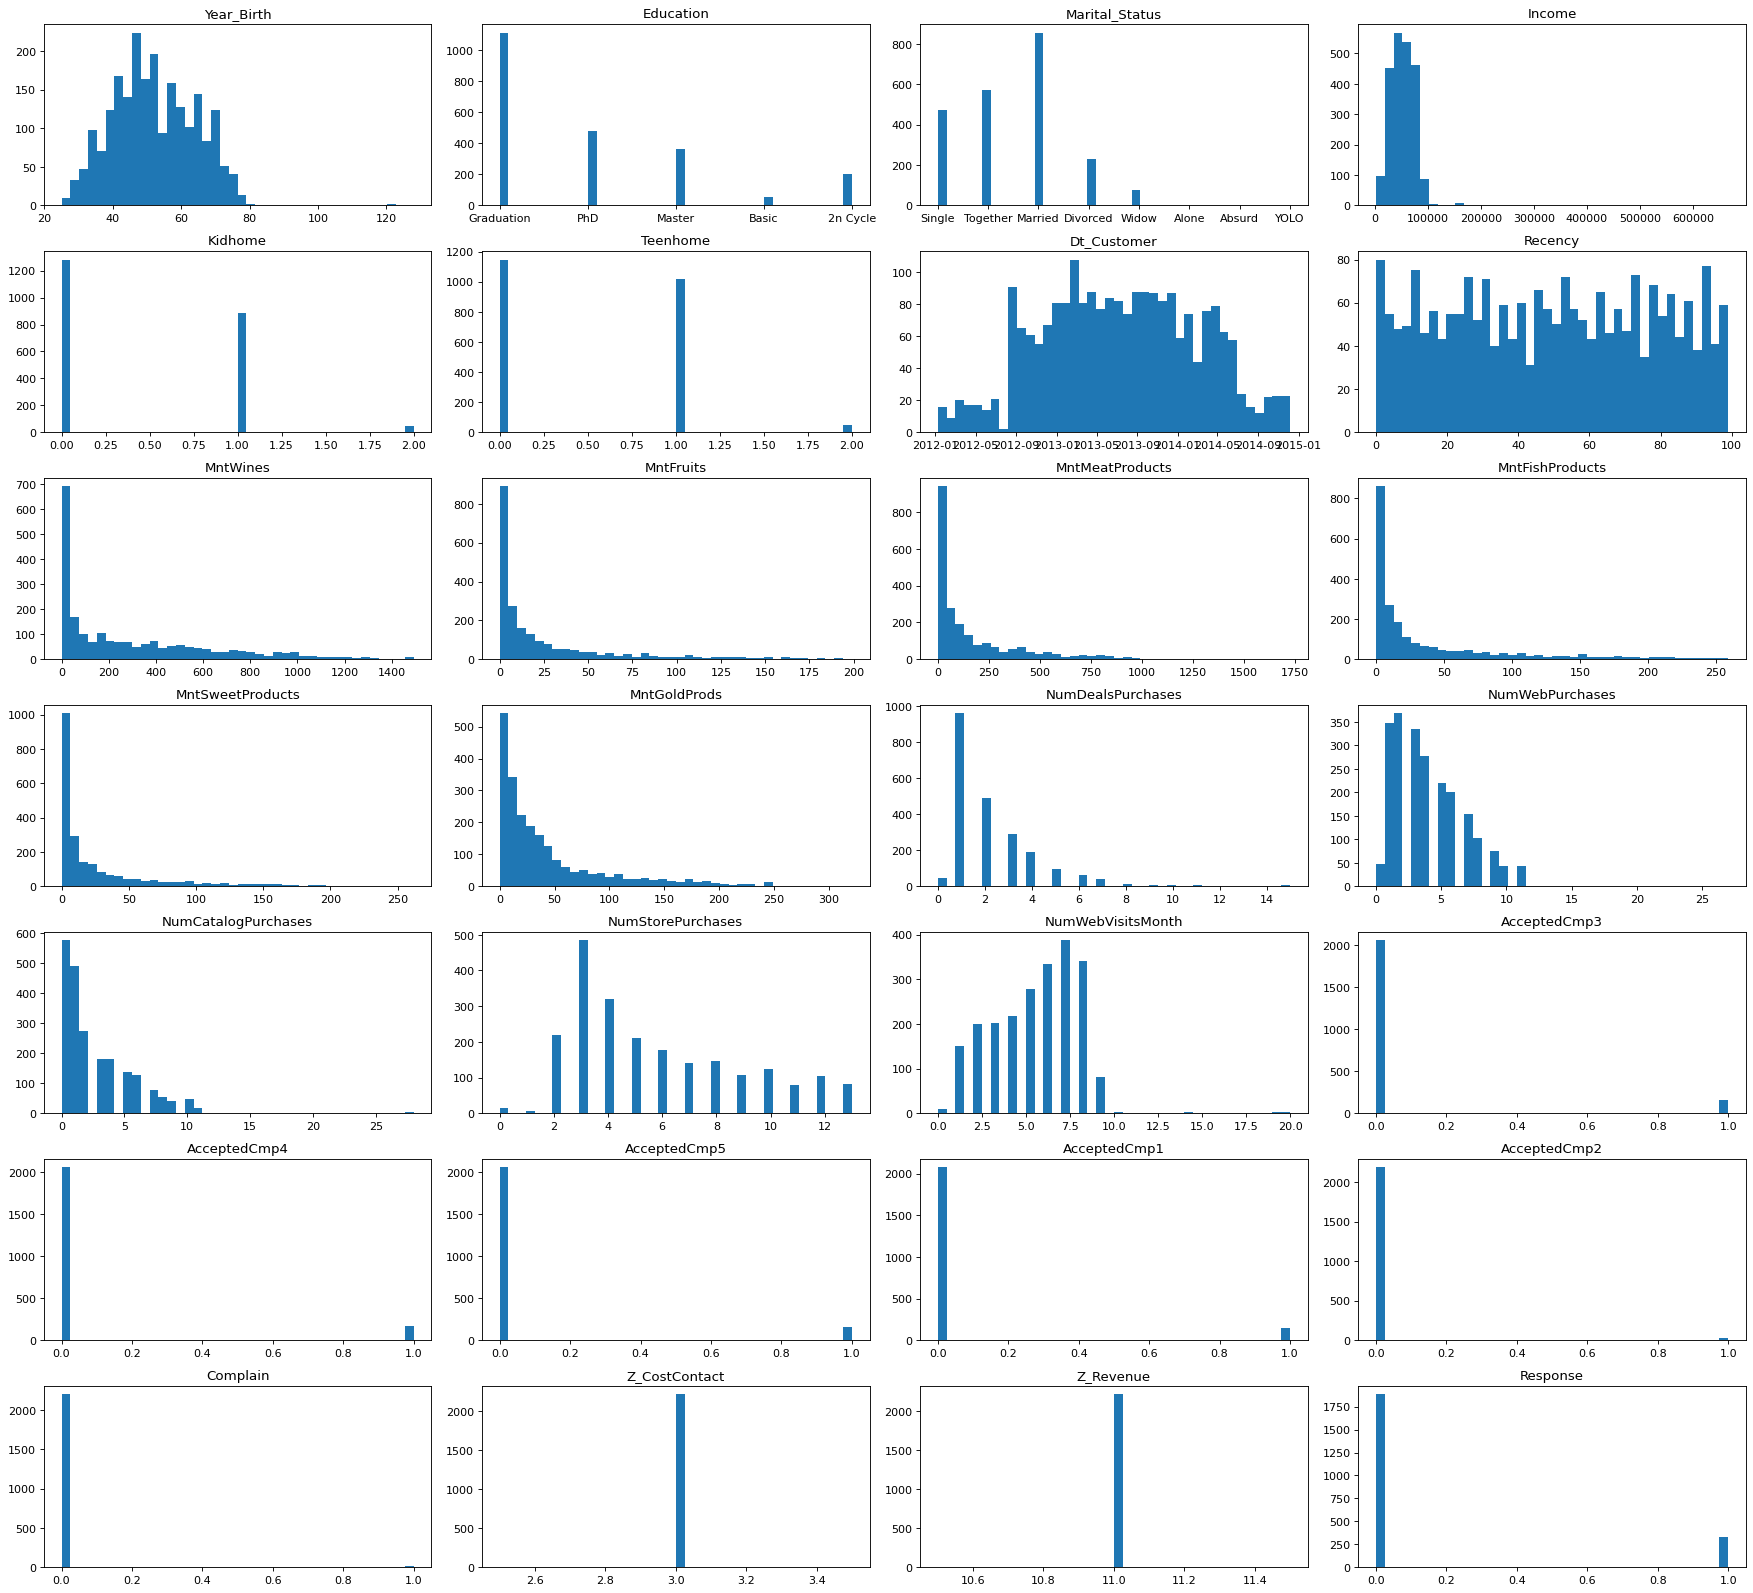

In [ ]:

columns=list(Data.columns)
count=1
plt.figure(figsize=(22, 20), dpi=80)
for i in range(7):
    for j in range(4):
        uniques=Data[columns[count]]
        plt.subplot(7, 4, count) 
        plt.hist(uniques,bins=40)
        plt.title(columns[count])
        count=count+1
plt.tight_layout(pad=1.0)
    

From the above plots its lear that the Data is Clean

Seperate Customer Details, Products they have purchased, Type of purchase they do and Response to the campaigns

In [ ]:
Cust_Data=Data[columns[0:9]]
E_Cust_Data=pd.get_dummies(Cust_Data["Education"], prefix='Education')
M_Cust_Data=pd.get_dummies(Cust_Data["Marital_Status"], prefix='MaritalState')
#Cust_Data=pd.concat([Cust_Data, E_Cust_Data], axis=1)
#Cust_Data=pd.concat([Cust_Data, M_Cust_Data], axis=1)
#Cust_Data=Cust_Data.drop(columns=["Education","Marital_Status"])
#Cust_Data=pd.get_dummies(Cust_Data["Marital_Status"], prefix="Marital_Status")

Prod_Data=Data[columns[9:15]]
Purc_Data=Data[columns[15:20]]
Camp_Data=Data[columns[20:25]]

# Question:1 Figure out the target customers when a new product is introduced

In [ ]:
def Get_Target_Customers(records,product,n):
    sorted_=records.sort_values(by=[product], ascending=False)
    sorted_["cumsum"]=sorted_[product].cumsum()
    Custs=sorted_["cumsum"][(sorted_["cumsum"]<n*max(sorted_["cumsum"]))]
    plt.plot(np.array(sorted_["cumsum"]))
    plt.title(product)
    plt.plot([len(Custs) , len(Custs)], [0, max(sorted_["cumsum"])],'k')
    plt.plot([0 , len(records)], [max(sorted_["cumsum"]), max(sorted_["cumsum"])],'r')
    plt.plot([0 , len(records)], [n*max(sorted_["cumsum"]), n*max(sorted_["cumsum"])],'g')
    plt.ylim(0,max(sorted_["cumsum"])*1.05)
    plt.xlim(0,len(records))
    plt.xlabel("No of customers")
    plt.ylabel("Revenue")
    return(records["ID"][Custs.index])


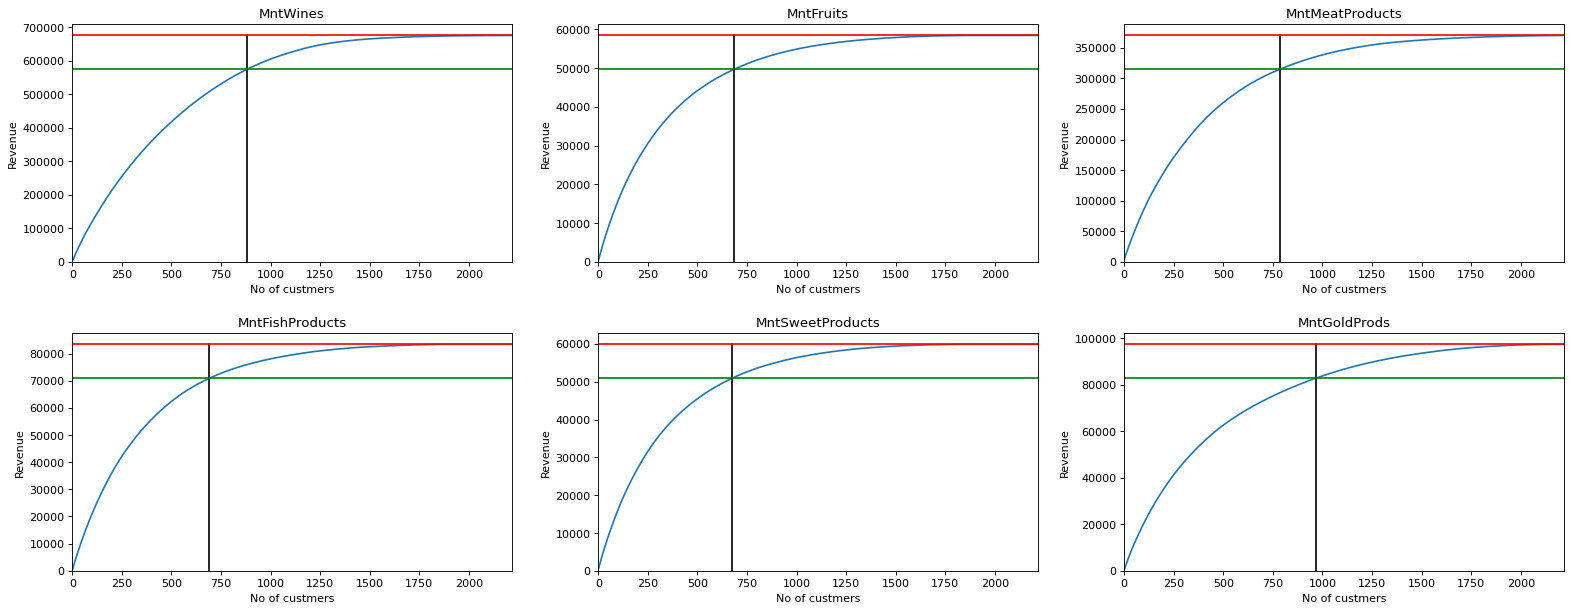

In [ ]:
r=0.85
plt.figure(figsize=(20, 8), dpi=80)
plt.subplot(2, 3, 1)
Wine_Cust_ID=Get_Target_Customers(Data,"MntWines",r)
plt.subplot(2, 3, 2)
Fruit_Cust_ID=Get_Target_Customers(Data,"MntFruits",r)
plt.subplot(2, 3, 3)
Meat_Cust_ID=Get_Target_Customers(Data,"MntMeatProducts",r)
plt.subplot(2, 3, 4)
Fish_Cust_ID=Get_Target_Customers(Data,"MntFishProducts",r)
plt.subplot(2, 3, 5)
Sweet_Cust_ID=Get_Target_Customers(Data,"MntSweetProducts",r)
plt.subplot(2, 3, 6)
Gold_Cust_ID=Get_Target_Customers(Data,"MntGoldProds",r)
plt.tight_layout(pad=2.0)


In [ ]:
print("No of Target Customers for Wine  : ",len(Wine_Cust_ID))
print("No of Target Customers for Fruits: ",len(Fruit_Cust_ID))
print("No of Target Customers for Meat  : ",len(Meat_Cust_ID))
print("No of Target Customers for Fish  : ",len(Fish_Cust_ID))
print("No of Target Customers for Sweet : ",len(Sweet_Cust_ID))
print("No of Target Customers for Gold  : ",len(Gold_Cust_ID))

No of Target Customers for Wine  :  880
No of Target Customers for Fruits:  684
No of Target Customers for Meat  :  784
No of Target Customers for Fish  :  691
No of Target Customers for Sweet :  675
No of Target Customers for Gold  :  966


# Question 2: Way of marketing to the target customer if new product is introduced